In [3]:
import numpy as np
import sympy as sp
from IPython.display import display
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 480
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "serrif"
import matplotlib.pyplot as plt
sp.init_printing()
import pandas as pd
import pyPLUTO as pp
from matplotlib import colors, cm
import bachelorproject as bp


units = bp.units(UNIT_LENGTH=1.e8, UNIT_DENSITY=1.e9*bp.CONST_mp, UNIT_VELOCITY=1.e8)
t0 = units.UNIT_TIME
print(units.UNIT_PRESSURE)

16.7262171


# Hole

## time evolution figure

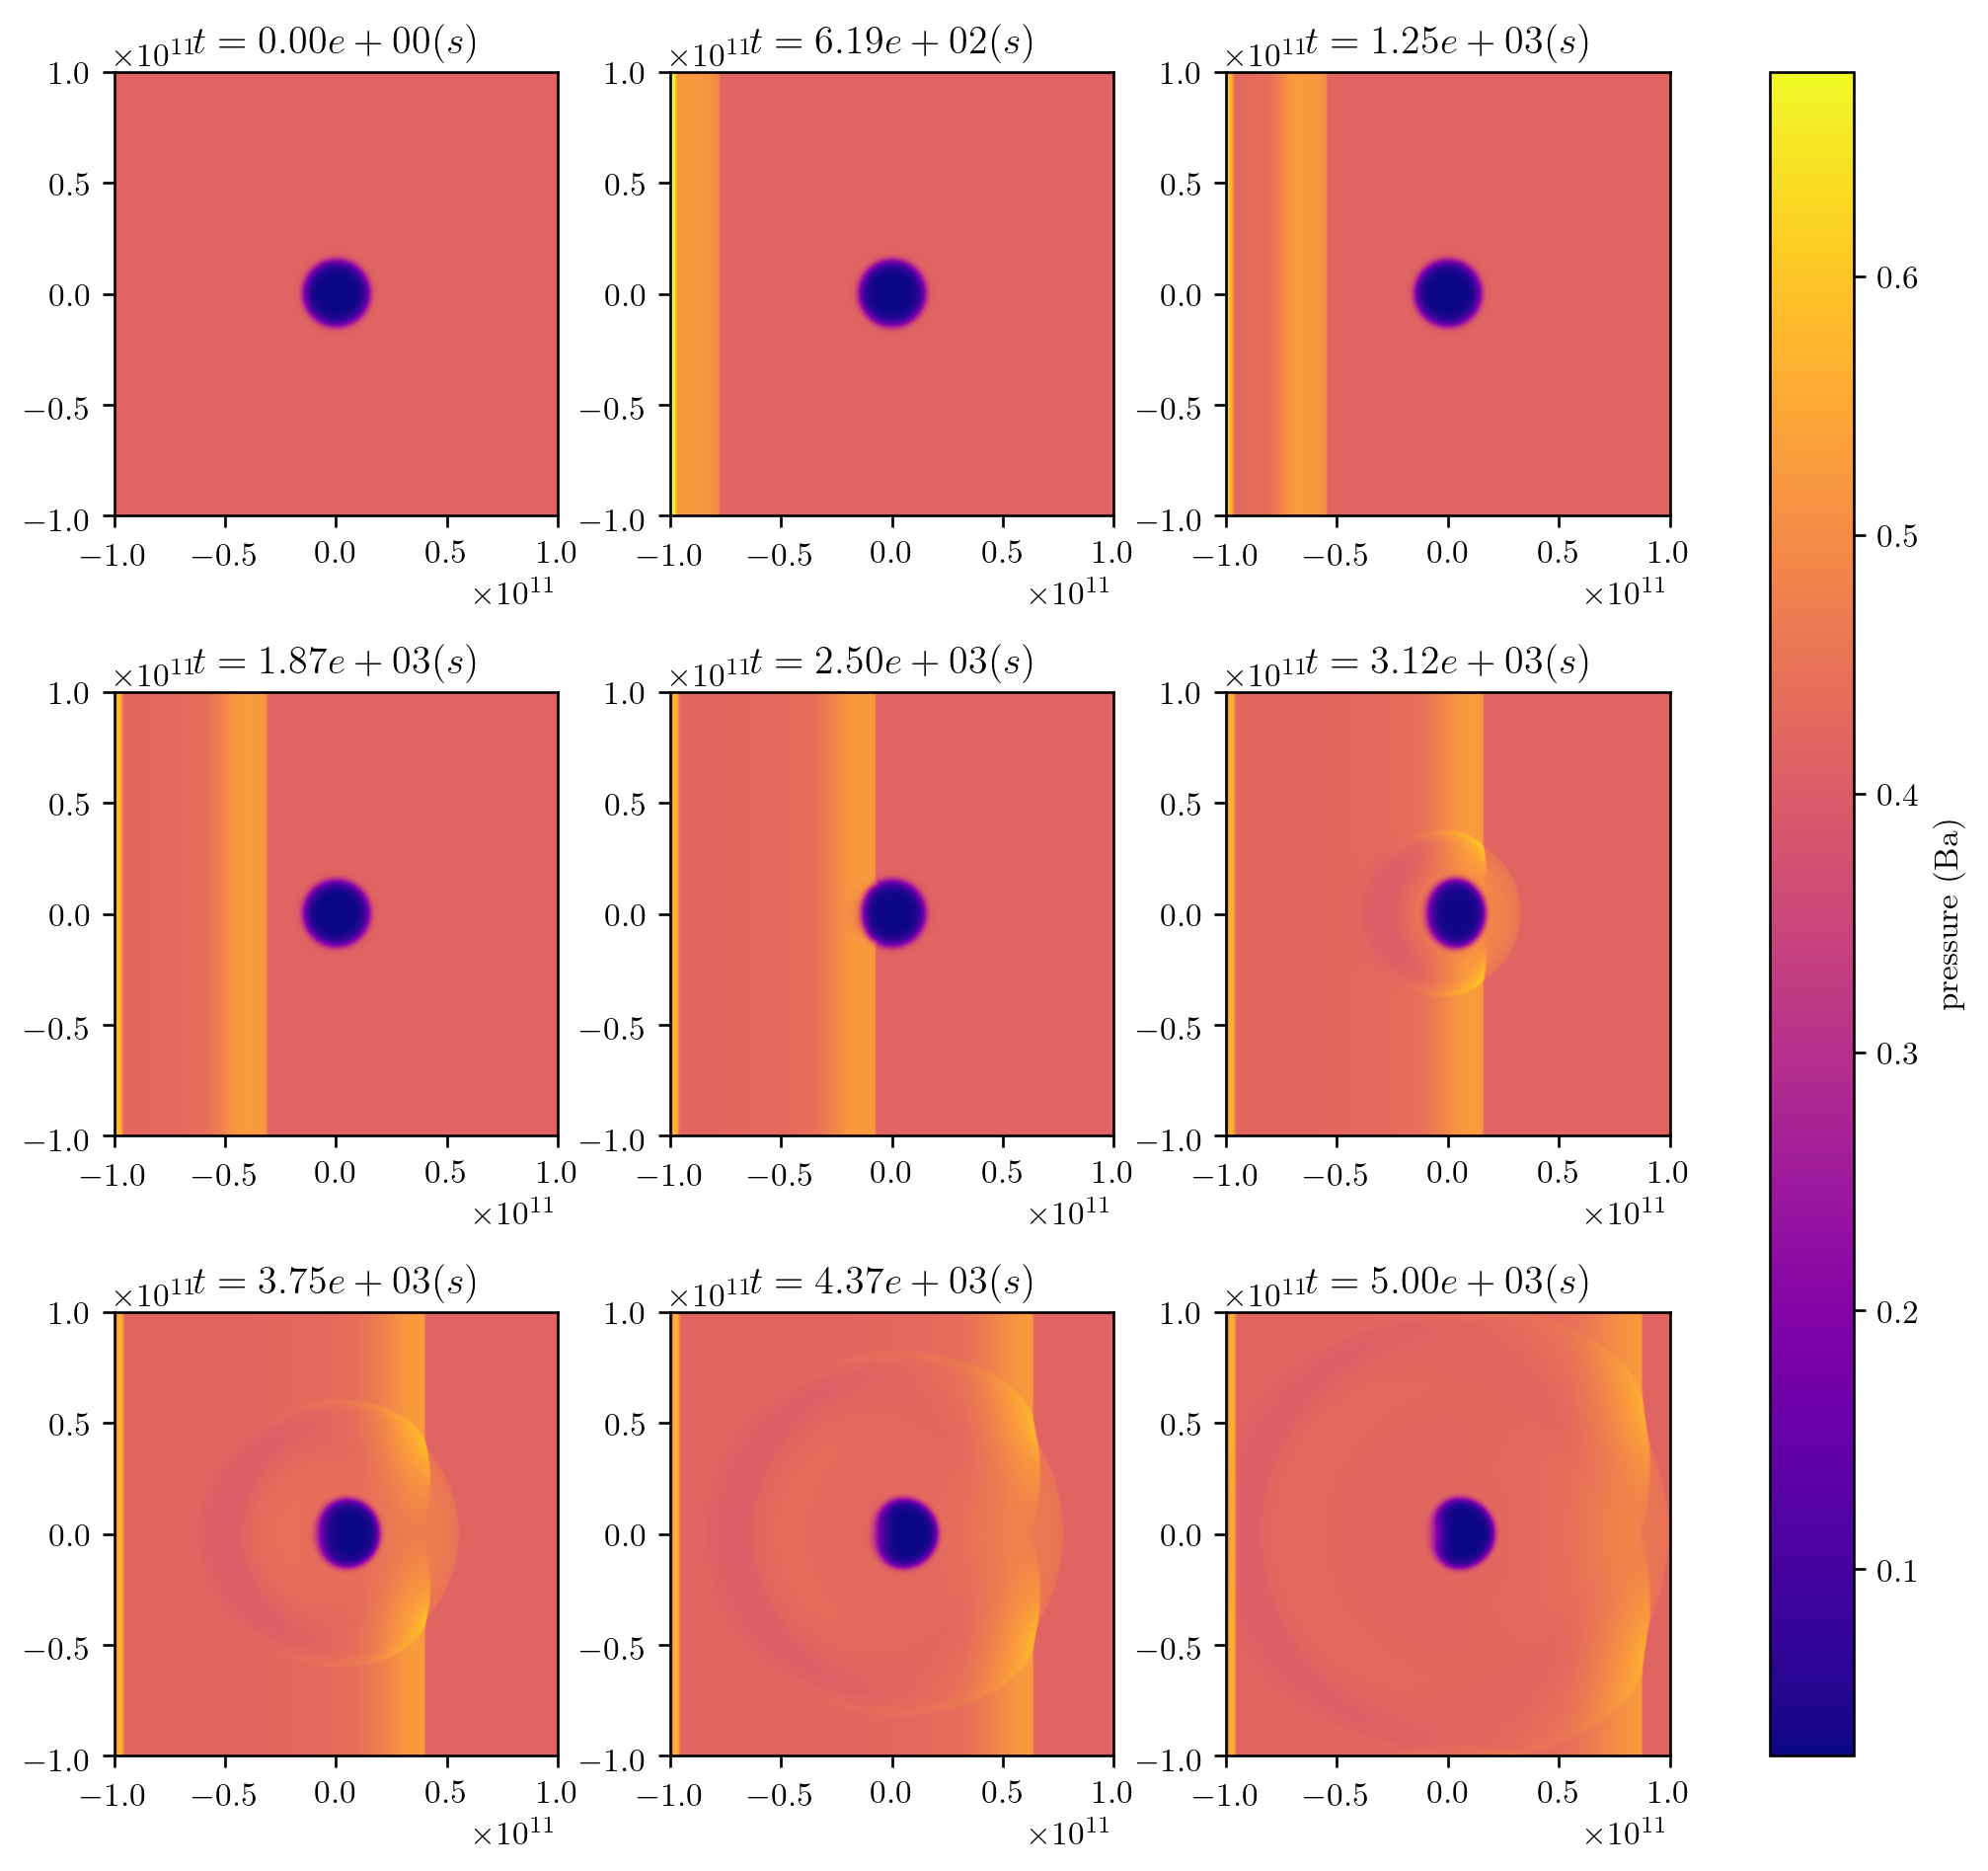

In [7]:
# Time evolution figure

j = 500
T = list(map(lambda t: int(j*t/8), range(9)))
fig, ax, = plt.subplots(3,3, figsize = (9,8))

images = [pp.pload(t, "../pluto-definitions/large_scale_structure/hole/") for t in T]
im = [0]*9

vmin = min(image.prs.min() for image in images)
vmax = max(image.prs.max() for image in images)
# vmax = 11
norm = colors.Normalize(vmin=vmin, vmax=vmax)
norm_true = colors.Normalize(vmin=vmin*units.UNIT_PRESSURE, vmax=vmax*units.UNIT_PRESSURE)

for i in range(9):
    axis = ax[i//3][i%3]
    t = T[i]
    frame = images[i]
    im[i] = bp.plot(axis, frame.prs, frame, norm=norm, L0 = units.UNIT_LENGTH)
    # im[i] = axis.imshow(frame.prs, norm=norm, cmap=cm.plasma)
    axis.set_title("$t = {:.2e} (s)$".format(frame.SimTime*units.UNIT_TIME))
fig.tight_layout()
fig.colorbar(cm.ScalarMappable(norm=norm_true, cmap=cm.plasma), ax  = ax, label = "pressure (Ba)")
fig.savefig("../report/figures/hole_time.pdf")

# Plume

## Time evolution figure

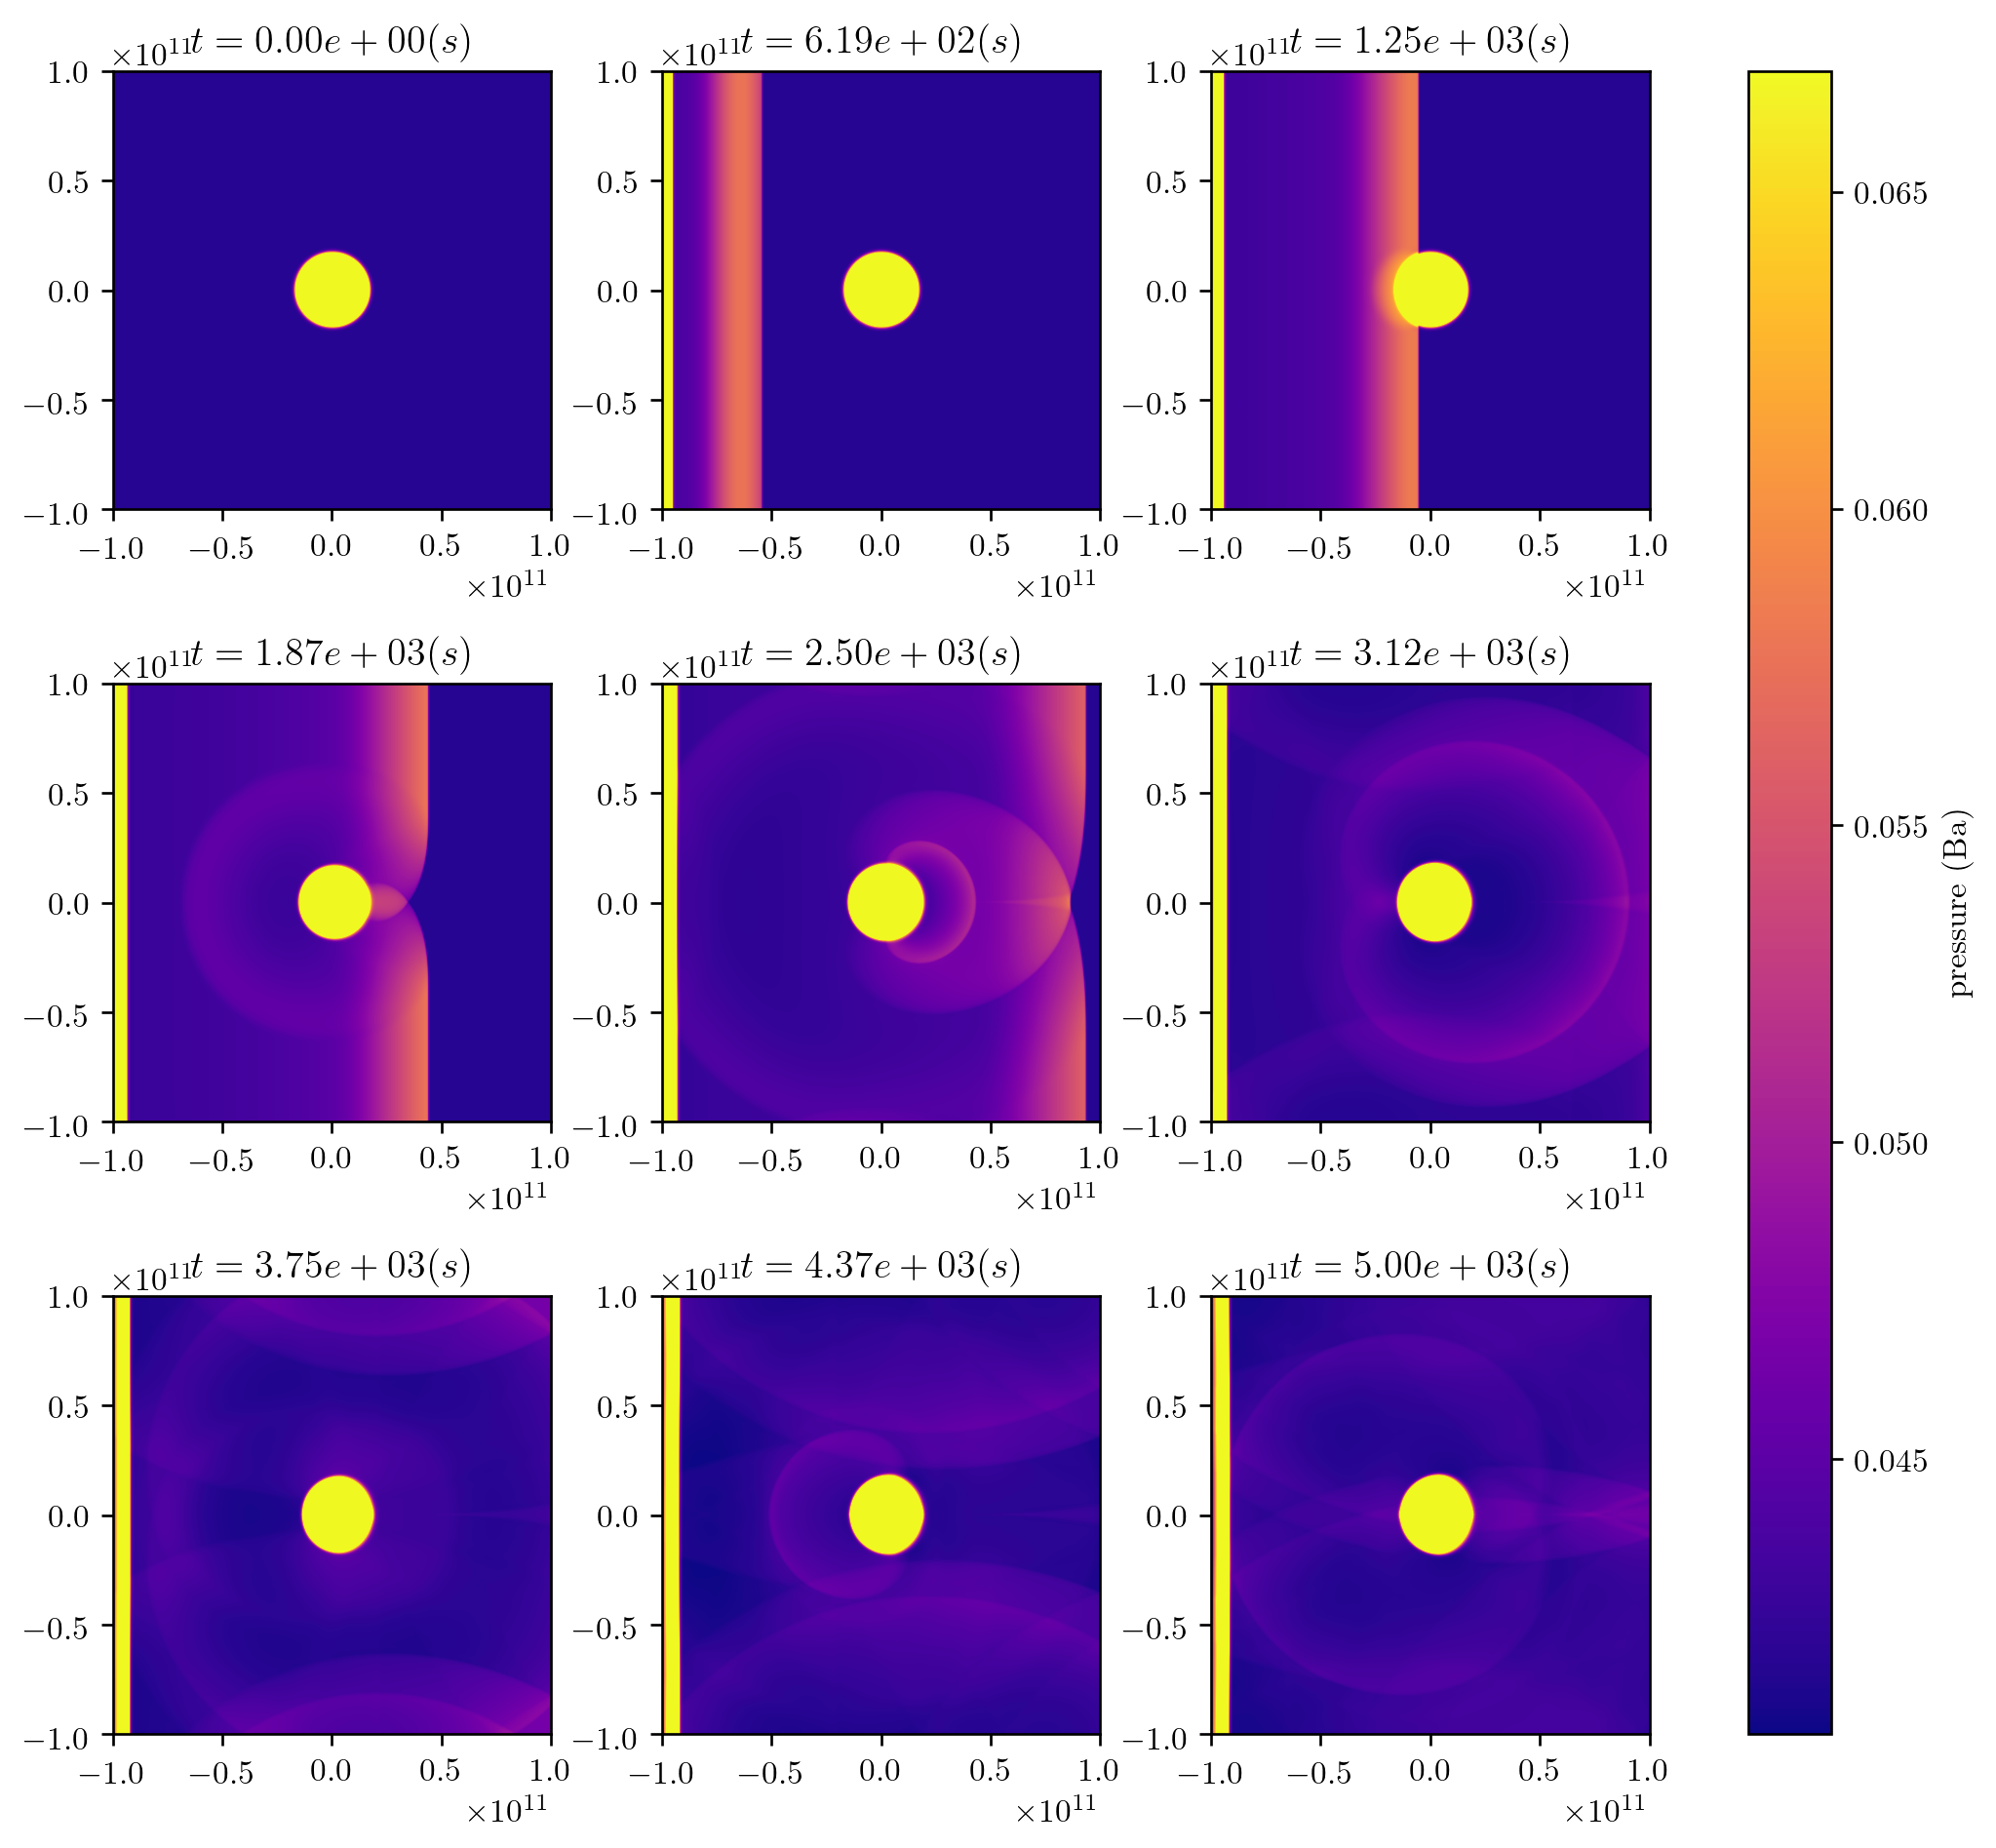

In [7]:
# Time evolution figure

j = 500
T = list(map(lambda t: int(j*t/8), range(9)))
fig, ax, = plt.subplots(3,3, figsize = (9,8))

images = [pp.pload(t, "../pluto-definitions/large_scale_structure/plume/") for t in T]
im = [0]*9

vmin = min(image.prs.min() for image in images)
vmax = max(image.prs.max() for image in images)
vmax =  0.004
norm = colors.Normalize(vmin=vmin, vmax=vmax)
norm_true = colors.Normalize(vmin=vmin*units.UNIT_PRESSURE, vmax=vmax*units.UNIT_PRESSURE)

for i in range(9):
    axis = ax[i//3][i%3]
    t = T[i]
    frame = images[i]
    im[i] = bp.plot(axis, frame.prs, frame, norm=norm, L0 = units.UNIT_LENGTH)
    # im[i] = axis.imshow(frame.prs, norm=norm, cmap=cm.plasma)
    axis.set_title("$t = {:.2e} (s)$".format(frame.SimTime*units.UNIT_TIME))
fig.tight_layout()
fig.colorbar(cm.ScalarMappable(norm=norm_true, cmap=cm.plasma), ax  = ax, label = "pressure (Ba)")
fig.savefig("../report/figures/plume_time.pdf")

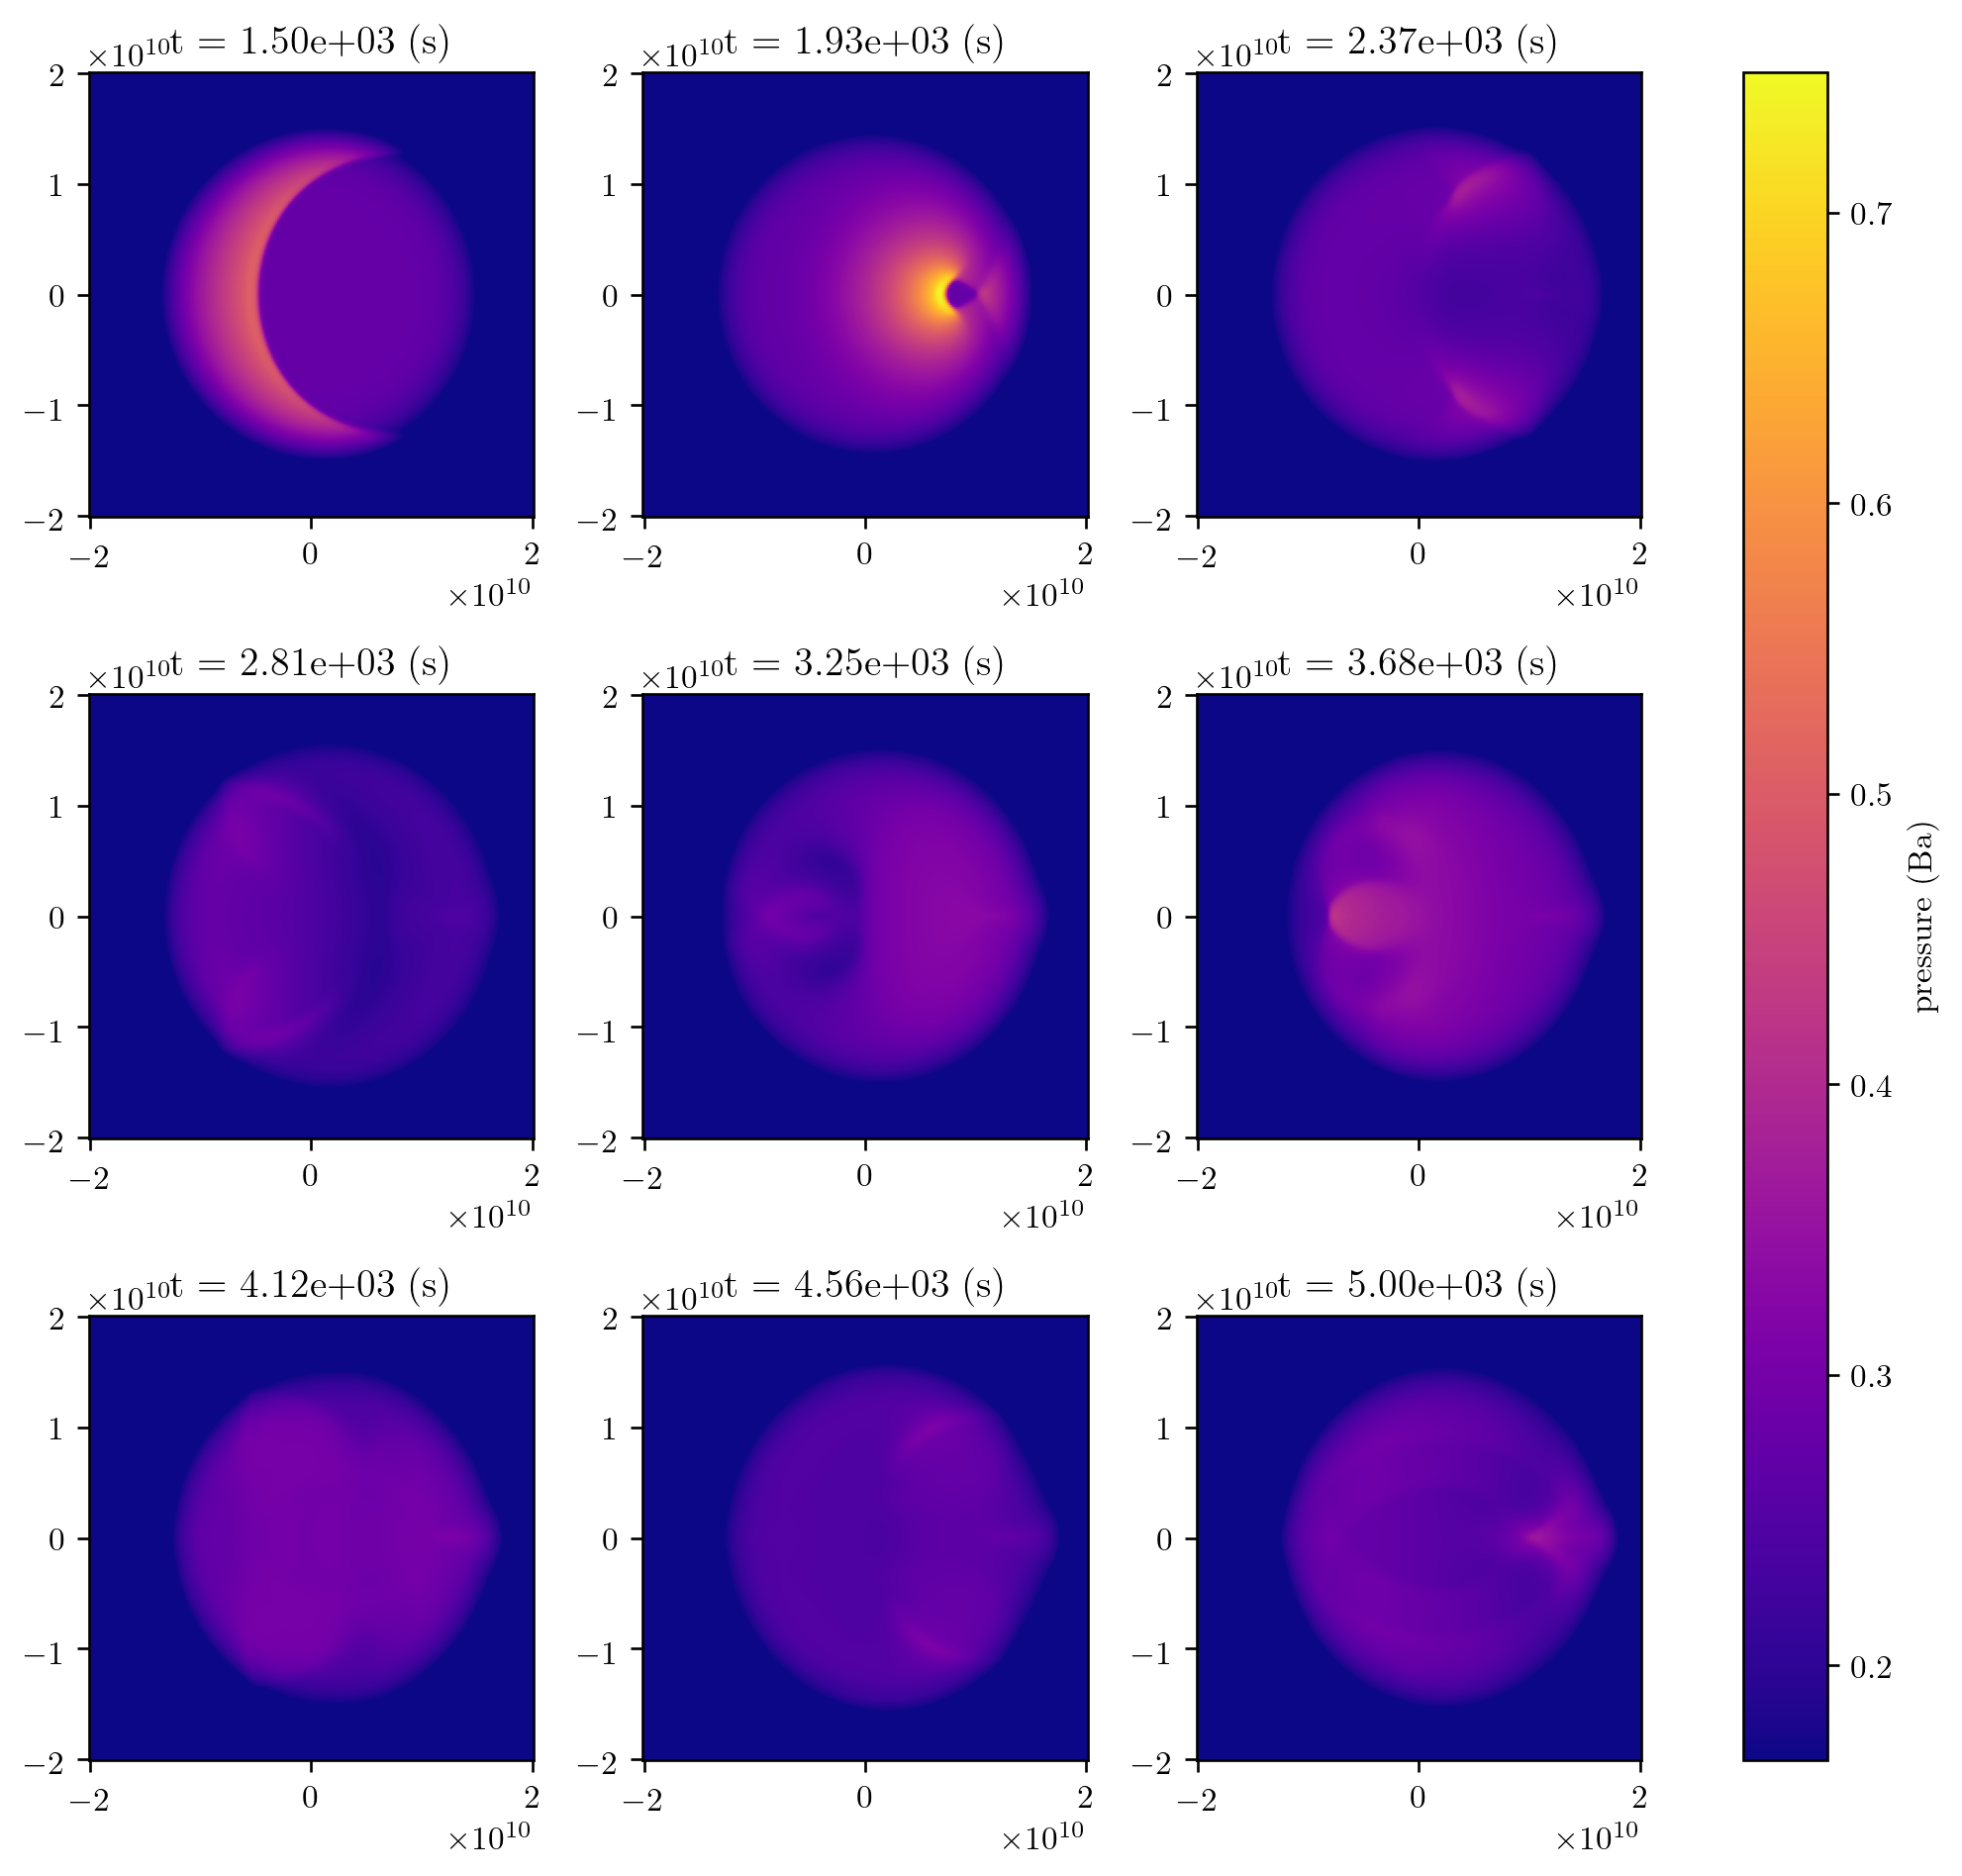

In [50]:
# Time evolution figure
xmin = int(0.4*1024)
xmax = 1024 - xmin
t0 = 150
t1 = 500
T = list(map(lambda t: int((1-t/8)*(t0) + (t/8)*(t1)), range(9)))
fig, ax, = plt.subplots(3,3, figsize = (9,8))

images = [pp.pload(t, "../pluto-definitions/large_scale_structure/plume/") for t in T]
im = [0]*9

vmin = min(image.prs.min() for image in images)
vmax = max(image.prs.max() for image in images)
vmin = 0.01
# # vmax = 0.0029
norm = colors.Normalize(vmin=vmin, vmax=vmax)
norm_true = colors.Normalize(vmin=vmin*units.UNIT_PRESSURE, vmax=vmax*units.UNIT_PRESSURE)

for i in range(9):
    axis = ax[i//3][i%3]
    t = T[i]
    frame = images[i]
    im[i] = bp.plot(axis, frame.prs, frame, norm=norm, L0 = units.UNIT_LENGTH, x_min = xmin, x_max = xmax, y_min = xmin, y_max = xmax )  # im[i] = axis.imshow(frame.prs, norm=norm, cmap=cm.plasma)
    axis.set_title("t = {:.2e} (s)".format(frame.SimTime*units.UNIT_TIME))

fig.tight_layout()
fig.colorbar(cm.ScalarMappable(norm=norm_true, cmap=cm.plasma), ax  = ax, label = "pressure (Ba)")
fig.savefig("../report/figures/plume_reflection.pdf")

# Drive

In [10]:
def drive(t, A, d):
    v0 = -A
    v1 = -v0
    v2 = 0
    return v1 + (v0 - v1)*(0.5*(1.-np.tanh(t/20.))) + (v2 - v1)*(0.5*(1.+np.tanh((t-d)/60.)));

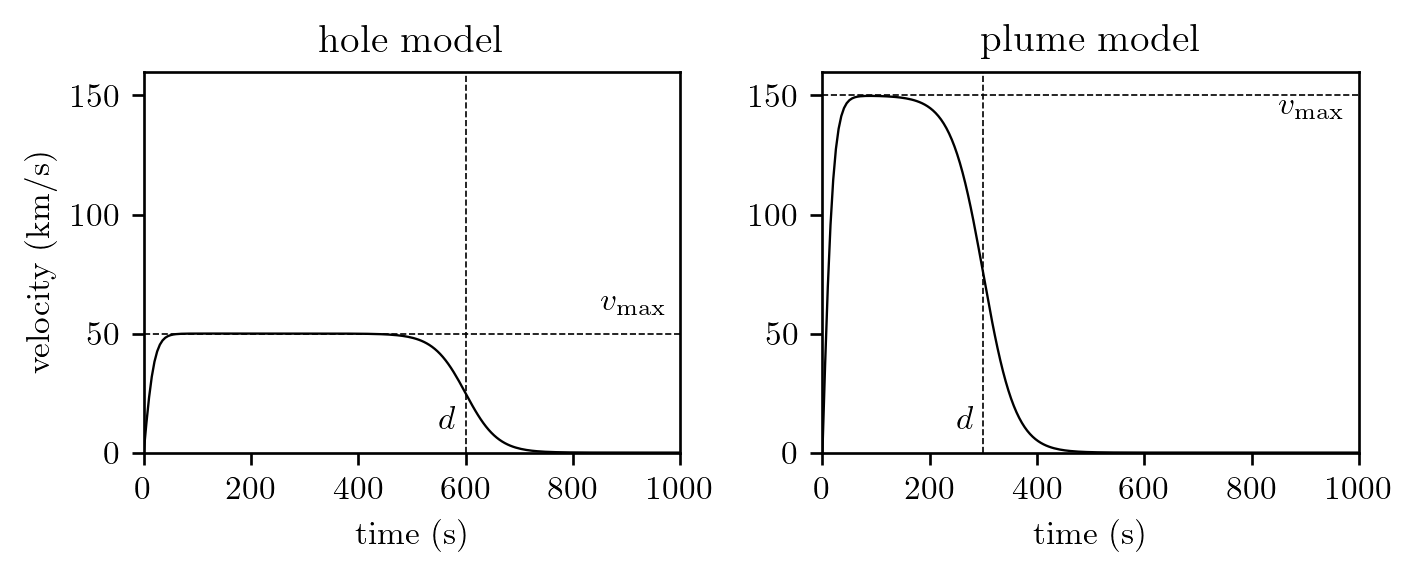

In [29]:
fig, ax, = plt.subplots(1, 2, figsize = (6,2.5))
xlabel = "time (s)"
t = np.linspace(0,1000,200)
ax[0].plot(t, drive(t, 50, 600), 'k', linewidth = 0.7)
ax[1].plot(t, drive(t, 150, 300), 'k', linewidth = 0.7)
ax[0].set_xlabel(xlabel)
ax[1].set_xlabel(xlabel)

ax[0].set_ylabel("velocity (km/s)")
ax[0].set_title("hole model")
ax[1].set_title("plume model")
ax[0].plot([0,1000],[50,50], linewidth = 0.5, linestyle="--" , color = "k")
ax[0].text(850, 58, "$v_{\mathrm{max}}$")
ax[0].plot([600, 600],[0,160], linewidth = 0.5, linestyle ="--", color = "k")
ax[0].text(550, 10,  "$d$")
ax[1].plot([0,1000],[150,150], linewidth = 0.5, linestyle="--" , color = "k")
ax[1].text(850, 140, "$v_{\mathrm{max}}$")
ax[1].plot([300, 300],[0,160], linewidth = 0.5, linestyle ="--", color = "k")
ax[1].text(250, 10,  "$d$")

ax[0].set_ylim(0, 160)
ax[1].set_ylim(0, 160)
ax[0].set_xlim(0, 1000)
ax[1].set_xlim(0, 1000)
fig.tight_layout()
fig.savefig("../report/figures/wave_drive.pdf")
# print(drive(t, 50, 600))

In [31]:
t0

# Determining reflection coefficient

0.17238232715651103


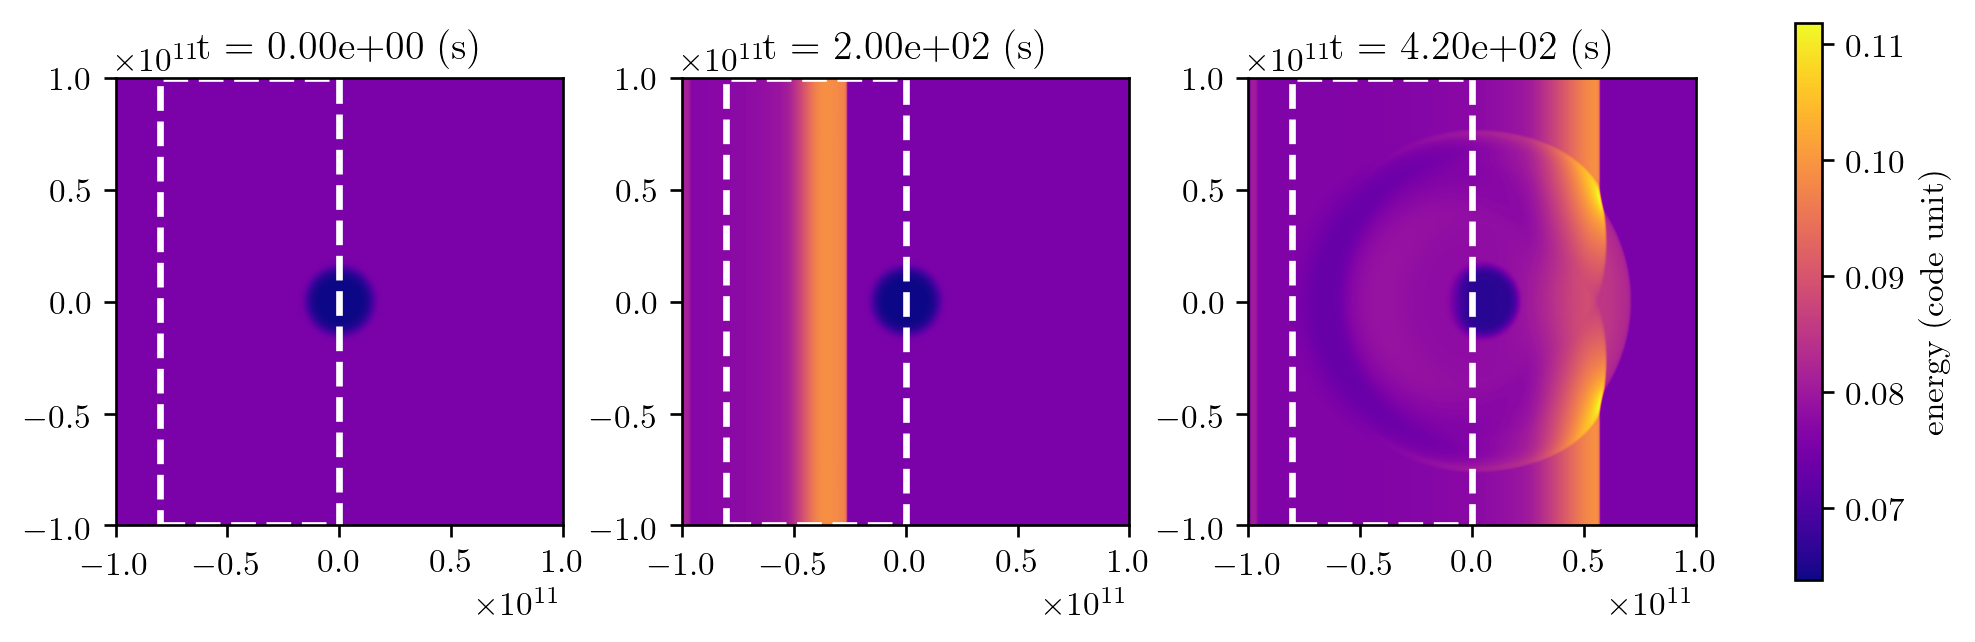

In [70]:
import matplotlib.patches as patches
t = [0, 200, 420]
frame = list(map(lambda i: pp.pload(i, "../pluto-definitions/large_scale_structure/hole/"), t))
energy = list(map(lambda x: calculate_energy(x), frame))
fig, ax, = plt.subplots(1,3, figsize=(9, 3))
for i in range(3):
    ax[i].imshow(energy[i][100:512, :])

E = list(map(lambda x: np.sum(x[100:512, :]), energy))

vmin = min(image.min() for image in energy)
vmax = max(image.max() for image in energy)
# vmin = 0.01
# # vmax = 0.0029
norm = colors.Normalize(vmin=vmin, vmax=vmax)
norm_true = colors.Normalize(vmin=vmin*units.UNIT_PRESSURE, vmax=vmax*units.UNIT_PRESSURE)
# rect = patches.Rectangle((frame[0].x1[0]*units.UNIT_LENGTH, frame[0].x2[100]*units.UNIT_LENGTH),.5e11,.5e11,linewidth=1,ls = "--",edgecolor='w',facecolor='none')

for i in range(3):
    axis = ax[i]
    bp.plot(axis, energy[i], frame[i], norm=norm, L0 = units.UNIT_LENGTH)  # im[i] = axis.imshow(frame.prs, norm=norm, cmap=cm.plasma)
    rect = patches.Rectangle((frame[0].x1[100]*units.UNIT_LENGTH, frame[0].x2[0]*units.UNIT_LENGTH),(frame[0].x1[512] - frame[0].x1[100])*units.UNIT_LENGTH,(frame[0].x2[-1] - frame[0].x2[0])*units.UNIT_LENGTH,linewidth=2,ls = "--",edgecolor='w',facecolor='none')
    axis.add_patch(rect)
    axis.set_title("t = {:.2e} (s)".format(t[i]*units.UNIT_TIME))
    

fig.tight_layout()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.plasma), ax  = ax, label = "energy (code unit)")
fig.savefig("../report/figures/plume_reflection.pdf")
R = (E[2]-E[0])/(E[1]-E[0])
print(R)

In [18]:
def calculate_energy(frame):
    Bsq = frame.Bx1**2 + frame.Bx2**2 + frame.Bx3**2
    vsq = frame.vx1**2 + frame.vx2**2 + frame.vx3**2
    gamma = 5/3
    rho_e = frame.prs/(gamma -1)
    return Bsq/2 + frame.rho*vsq/2 + rho_e

In [62]:
frame[0].x1[0]*units.UNIT_LENGTH